Today I tried to port to python the Raincloud plot (or PetitPrince plot, depending on the orientation) from R (under ggplot2) to Python.  The Raincloud plot is a variant of the violin plot written in R ggplot2 by [Micah Hallen](https://micahallen.org/2018/03/15/introducing-raincloud-plots/). Everithing started with  this xkcd comic, making fun of the violin plot.

![xkcd](https://imgs.xkcd.com/comics/violin_plots.png)

---

I found a [tweet](https://twitter.com/flxrue/status/974639616912478210) asking for a .py version, and I agreed. Alas, the py version for ggplot2 does not allow to create new styles in a confortable way. So I decided to use the [seaborn](https://seaborn.pydata.org/) library and to rewrite a bit the `violin_plot` function. [This](half_viol.py) is the rewitten version.

---

Then I tried to replicate the plots from the [original post]([Micah Hallen](https://micahallen.org/2018/03/15/introducing-raincloud-plots/)), using Jupyter.


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set(style="darkgrid")
#sns.set(style="whitegrid")
#sns.set_style("white")
sns.set(style="whitegrid",font_scale=2)

import pandas as pd

In [2]:
df=pd.read_csv("https://data.bris.ac.uk/datasets/112g2vkxomjoo1l26vjmvnlexj/2016.08.14_AnxietyPaper_Data%20Sheet.csv"\
               ,sep=",")

ddf=pd.melt(df, id_vars=["Participant"], value_vars=["AngerUH", "DisgustUH", "FearUH", "HappyUH"],\
           var_name="EmotionCondition", value_name="Sensitivity")

In [3]:
import half_viol

---

This is the vertical version


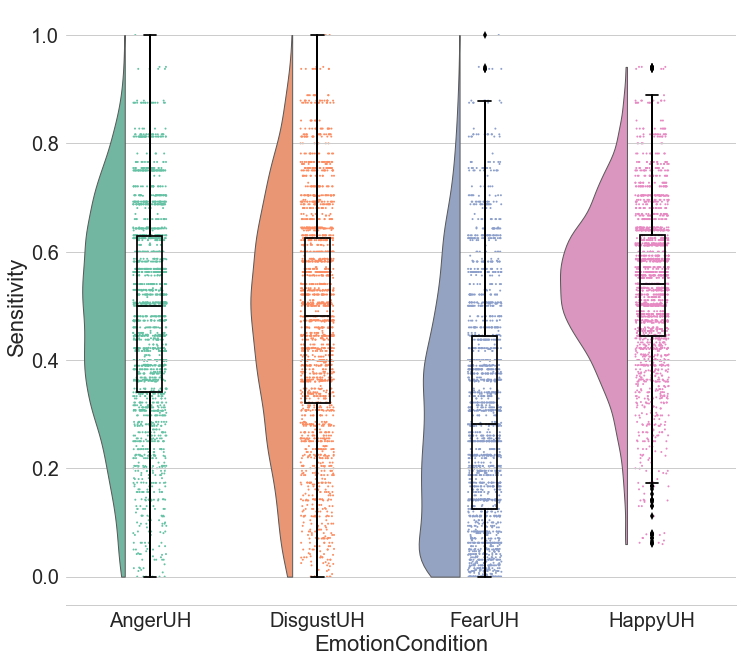

In [4]:
f, ax = plt.subplots(figsize=(12, 11))

dy="Sensitivity"; dx="EmotionCondition"; ort="v"
# Draw a violinplot with a narrower bandwidth than the default
ax=half_viol.half_violinplot(data=ddf, palette="Set2", bw=.2,  linewidth=1,cut=0.,\
                   scale="area", width=.8, inner=None,orient=ort,x=dx,y=dy)
ax=sns.stripplot(data=ddf, palette="Set2", edgecolor="white",size=2,orient=ort,\
                 x=dx,y=dy,jitter=1,zorder=0)
ax=sns.boxplot(data=ddf, color="black",orient=ort,width=.15,x=dx,y=dy,zorder=10,\
              showcaps=True,boxprops={'facecolor':'none', "zorder":10},\
               showfliers=True,whiskerprops={'linewidth':2, "zorder":10},saturation=1)

# Finalize the figure
#ax.set(ylim=(3.5, -.7))
sns.despine(left=True)


And the horizontal one.

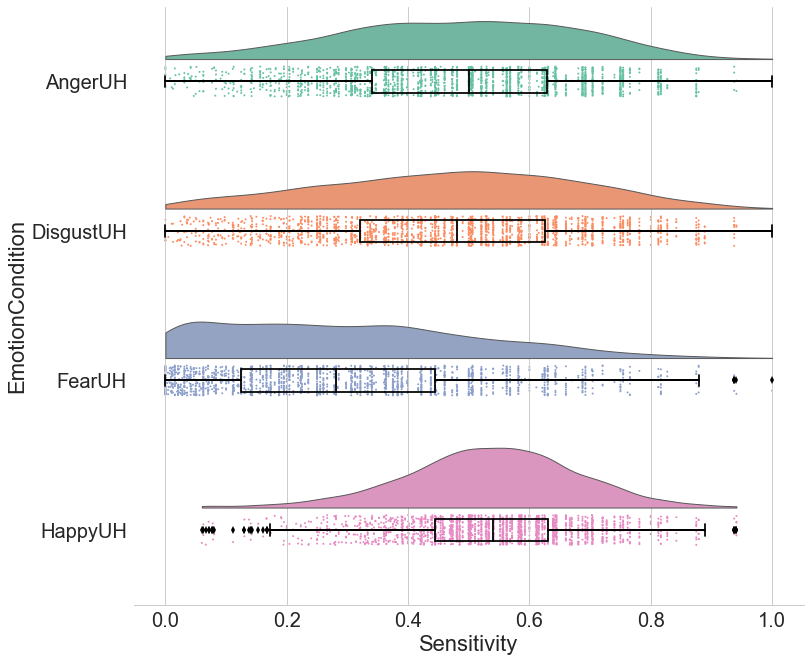

In [5]:
f, ax = plt.subplots(figsize=(12, 11))

dx="Sensitivity"; dy="EmotionCondition"; ort="h"
ax=half_viol.half_violinplot(data=ddf, palette="Set2", bw=.2,  linewidth=1,cut=0.,\
                   scale="area", width=.8, inner=None,orient=ort,x=dx,y=dy)
ax=sns.stripplot(data=ddf, palette="Set2", edgecolor="white",size=2,orient=ort,\
                 x=dx,y=dy,jitter=1,zorder=0)
ax=sns.boxplot(data=ddf, color="black",orient=ort,width=.15,x=dx,y=dy,zorder=10,\
              showcaps=True,boxprops={'facecolor':'none', "zorder":10},\
               showfliers=True,whiskerprops={'linewidth':2, "zorder":10},saturation=1)

# Finalize the figure
#ax.set(ylim=(3.5, -.7))
sns.despine(left=True)


I am quite satisfied about the results...moreover seaborn turns out to be a good choice, given the native integration with `pandas`.